In [1]:
# external api
import fundamentalanalysis as fa
import yfinance as yf

# data analytic 
import numpy as np
import pandas as pd

# визуализация
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline 

# additional liberies
import datetime
import statistics as st
import os

# ml 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'C:\\Users\\PC\\PycharmProjects\\Tinkoff_Investment\\lessons_and_tests\\ml_tests'

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a' #job.chap@icloud.com
api_key = 'c81352430e2fe3c941faf0814227562b' #jobs.chaps@gmail.com
# api_key = 'a765d11740cccfb61177da0ad8699d1e' #job.chap@gmail.com

In [5]:
''' Колонки '''
# ticker = 'ATEX'
ticker = 'F'



''' для фильтрации'''
filt_start_date = '1990'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [6]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
# df.tail(3)

In [7]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
# df.tail(3)

In [8]:
''' добавляем цифру к году, чтобы видень данные как начало года, а не как факт '''
def change_index_plus_one(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        df_index[i] = str(int(df_index[i])+1)
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

In [9]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr = change_index_plus_one(df_key_metr)
# df_key_metr.head(3)

In [10]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [11]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        # x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [12]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

In [13]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

In [14]:
df_with_changes_key

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,F,SNP,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % F,change % SNP
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022,34.162115,4.494362,3.95565,2.39539,12.426209,12.157103,12,12.157103,36.717615,77984143591.899994,196929143591.899994,4.347669,0.571979,4.93977,8.157337,1.607291,1.607291,1.444387,6.38924,12.474133,20.599283,0.230008,0.122589,1.843566,0.810835,3.859094,1.201362,0.641106,0.880136,0.005168,0.022468,0,0,0.00284,-0.394438,-0.045672,-1.044799,0.002237,35.062296,0.027197,0.069983,-30.030757,18269000000,47892000000,-99417000000,2.874853,43913000000,22349000000,12065000000,117.559978,71.149707,38.409826,3.104798,5.130028,9.502777,0.36969,-1.560261,18.493223,4515.549805,6.749891,Plus,-35.243322,-48.632358,-1.184267,57.380815,56.782531,57.380815,-15.800453,86.405784,9.654429,Plus,73.831620,186.557418,261.248949,17.908314,17.908314,2.257594,-40.964065,68.569287,112.507071,Plus,-72.318259,-49.179882,-8.350772,-53.513260,0.016110,Plus,Plus,-63.725670,Plus,0.0,0,88.816582,66.712418,1.131180,35.685538,42.927619,368.742083,Plus,Plus,-15.852587,-6.561989,57.492848,-16.949025,-45.870966,-8.806213,0.325455,5.495562,-21.840648,-1.014112,9.781307,27.943743,1.024501,-8.909811,Plus,7.957424,93.753232,21.573991
2021,32.002014,-0.321923,6.108482,4.663227,12.575132,7.724641,7.653914,7.724641,43.607853,41835688808.099998,179590688808.100006,-32.709686,0.329042,1.723832,2.258093,1.36317,1.36317,1.412498,10.822628,7.400004,9.693

In [15]:
df_some_columns = df_with_changes_key[['change % debtToAssets', 
                                       f'change % {ticker}', 
                                       'change % cashPerShare', 
                                       'change % capexPerShare',
                                       'change % inventoryTurnover',
                                       'change % receivablesTurnover',
                                       'change % capexToRevenue',
                                       'change % currentRatio',
                                       f'{ticker}'
                                      ]]

# удаляем последнюю строку, где значения равны 0
df_some_columns = df_some_columns.drop(df_some_columns.index[-1])
df_some_columns.head()

,change % debtToAssets,change % F,change % cashPerShare,change % capexPerShare,change % inventoryTurnover,change % receivablesTurnover,change % capexToRevenue,change % currentRatio,F
Date_index,,,,,,,,,
2022,-8.350772,93.753232,-1.184267,7.957424,-8.909811,27.943743,1.131180,0.016110,18.493223
2021,1.520033,21.418196,44.147138,-24.783088,-16.460031,-2.110529,-7.748153,3.354844,9.544730
2020,1.402740,6.881475,1.593201,-2.415422,2.820663,1.344764,0.825432,-3.123155,7.861038
2019,-0.551305,-14.014582,-12.201832,11.176993,-4.961404,-2.001525,7.987683,-2.084051,7.354911
2018,-1.454934,-6.276851,0.078587,0.635257,-10.170747,-5.668739,-2.384612,1.981771,8.553673


In [16]:
''' pairplot''' 
# cols = ['change % debtToAssets', f'change % {ticker}', 'change % cashPerShare']
# sns_plot = sns.pairplot(df_some_columns[cols])

# sns_plot  # показать график

' pairplot'

In [17]:
''' jointplot '''
# ax = sns.jointplot(df_some_columns[f'change % {ticker}'])
# ax.ax_joint.set_xticklabels(ax.ax_joint.get_xticklabels(), rotation=45)
# plt.show()

' jointplot '

In [18]:
''' приводим результаты к 1 (рост за год) и 0 (падение)'''

t = []
for i in range(len(df_some_columns[f'change % {ticker}'])):
    if df_some_columns[f'change % {ticker}'][i] > 0:
        t.append(1)
    else:
        t.append(0)
        
df_some_columns['Result'] = t

In [19]:
''' обратный порядок таблицы ''' 
df_flipped = df_some_columns.iloc[::-1]
df_flipped.tail()

,change % debtToAssets,change % F,change % cashPerShare,change % capexPerShare,change % inventoryTurnover,change % receivablesTurnover,change % capexToRevenue,change % currentRatio,F,Result
Date_index,,,,,,,,,,
2018,-1.454934,-6.276851,0.078587,0.635257,-10.170747,-5.668739,-2.384612,1.981771,8.553673,0
2019,-0.551305,-14.014582,-12.201832,11.176993,-4.961404,-2.001525,7.987683,-2.084051,7.354911,0
2020,1.402740,6.881475,1.593201,-2.415422,2.820663,1.344764,0.825432,-3.123155,7.861038,1
2021,1.520033,21.418196,44.147138,-24.783088,-16.460031,-2.110529,-7.748153,3.354844,9.544730,1
2022,-8.350772,93.753232,-1.184267,7.957424,-8.909811,27.943743,1.131180,0.016110,18.493223,1


ML Linear Regression model

In [20]:
''' выбираем данные для учителя '''
x = df_flipped[f'{ticker}']  # признаки
# y = df_flipped[f'change % {ticker}']
y = df_flipped[f'{ticker}']  # значения для целевых величин

In [21]:
x.shape

(27,)

In [22]:
y.shape

(27,)

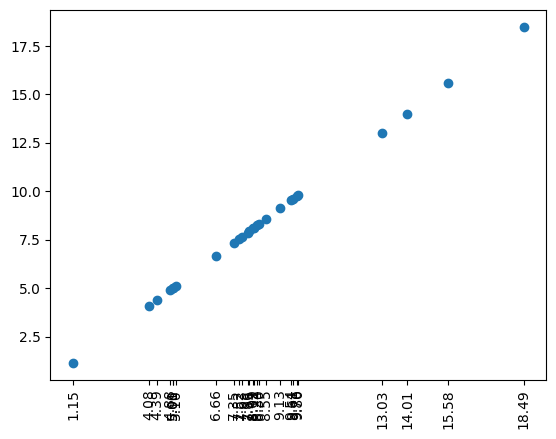

In [23]:
plt.scatter(x,y)
plt.xticks(x, rotation=90)
plt.show()

In [24]:
''' создаем модель с гипперпараметром '''
model = LinearRegression(fit_intercept=True)

model

LinearRegression()

In [25]:
X = x[:, np.newaxis]
X.shape

(27, 1)

In [26]:
model.fit(X,y)

LinearRegression()

In [27]:
''' угловой коэффициент'''
model.coef_

array([1.])

In [28]:
''' точка пересечения с осью координат'''
model.intercept_

1.7763568394002505e-15

In [29]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

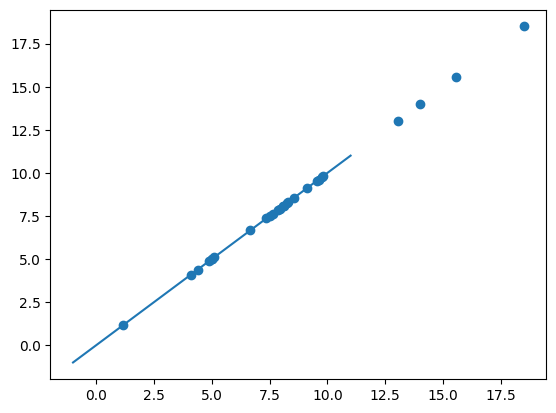

In [30]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

ML Gaussian NB

In [31]:
''' добавляем данные для обучения '''
X_data = df_flipped[['change % cashPerShare','change % debtToAssets', 'change % cashPerShare']] # признаки
y_data = df_flipped[['Result']]  # целевая величина

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, y_data, random_state = 1)

In [33]:
y_data

,Result
Date_index,
1996,1
1997,1
1998,1
1999,1
2000,0
2001,1
2002,0
2003,0
2004,1
